In [1]:
import sys
sys.path.append('../src')

import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import nrmse, rsquare, plot_result, plot_reservoir_states
from datasets import mackey_glass_generate, plot_mackey_glass, to_forecasting, to_torch_tensor
from model import ESNForce

In [2]:
TIMESTEPS = 2510
TAU = 17

X = mackey_glass_generate(TIMESTEPS, tau=TAU, seed=5555)
X = 2 * (X - X.min()) / (X.max() - X.min()) - 1

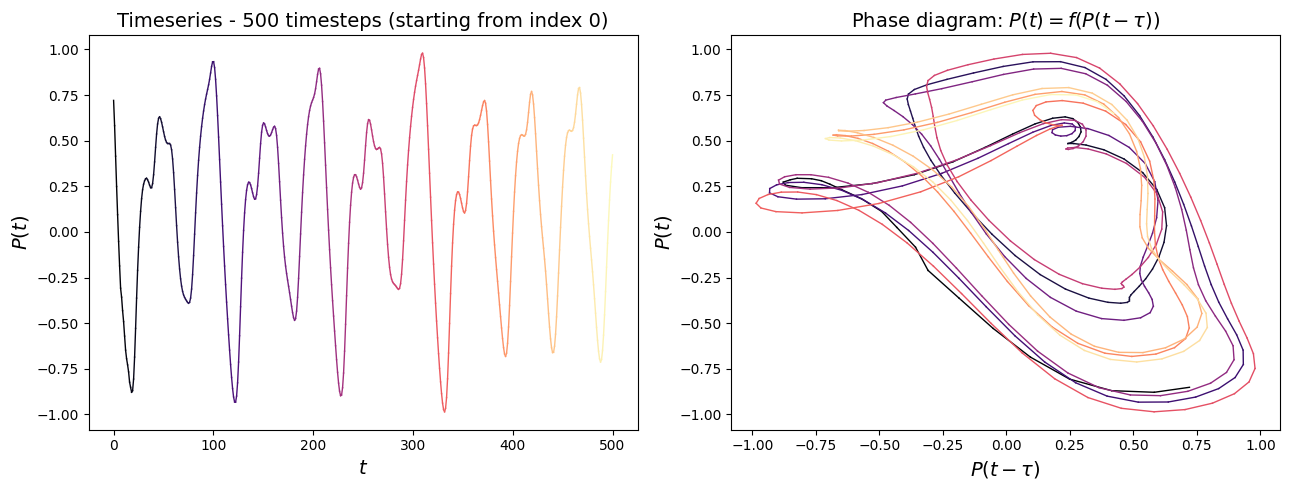

In [3]:
# TODO: сделать файл с общими стилями для отображения графиков
plot_mackey_glass(X, TAU, 500)

In [4]:
x, y = to_forecasting(X, forecast=1)

In [5]:
X_train1, y_train1 = to_torch_tensor((x[:2000], y[:2000]), dtype=torch.float32)
X_test1, y_test1 = to_torch_tensor((x[2000:], y[2000:]), dtype=torch.float32)

In [6]:
model = ESNForce(
    input_size=1,
    hidden_size=20,
    output_size=1,
    spectral_radius=1.25,
    leaky_rate=0.3,
    input_scaling=1.0,
    sparsity=0.1,
    feedback=True,
    feedback_scaling=0.5,
    noise=False,
    noise_level=0.01,
    lambda_=0.9999,
    delta=1
    # random_seed=451
)

In [7]:
model.output.W.shape

torch.Size([1, 20])

In [8]:
predict, state = model.fit(X_train1, y_train1)

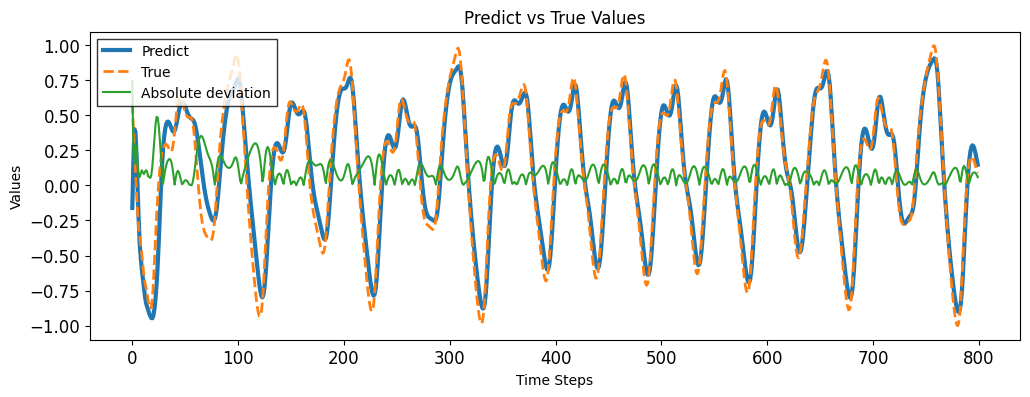

In [9]:
plot_result(predict, y_train1, start=0, length=800)

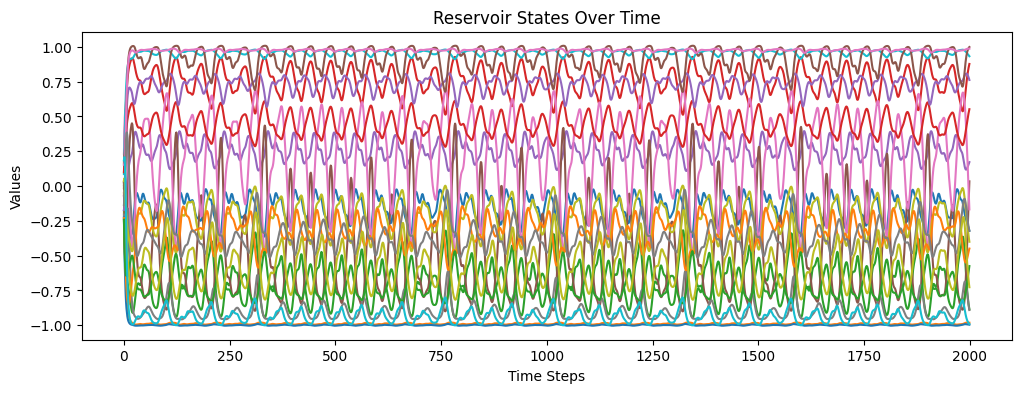

In [10]:
plot_reservoir_states(state)

In [11]:
rsquare(y_train1, predict), nrmse(y_train1, predict)

(0.9693947825580835, 0.042940094994854724)

In [12]:
# predict, state = model(X_test1)
predict, state = model.fit(X_test1, y_test1)

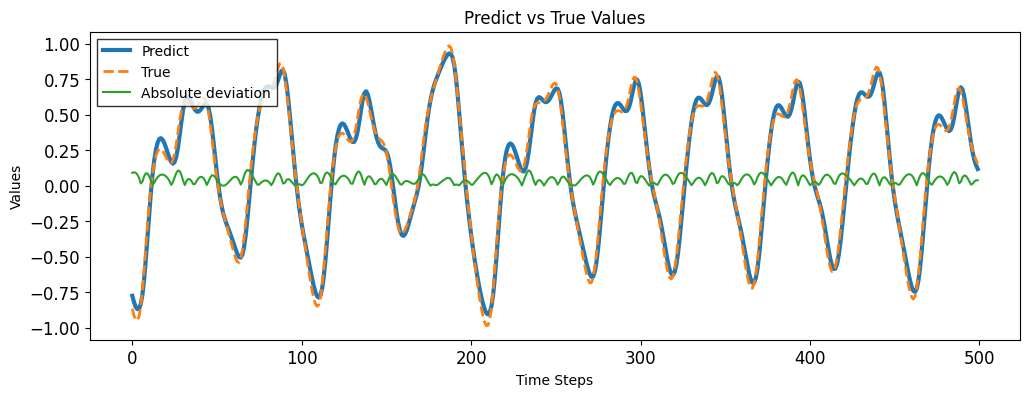

In [13]:
plot_result(predict, y_test1, start=0, length=500)

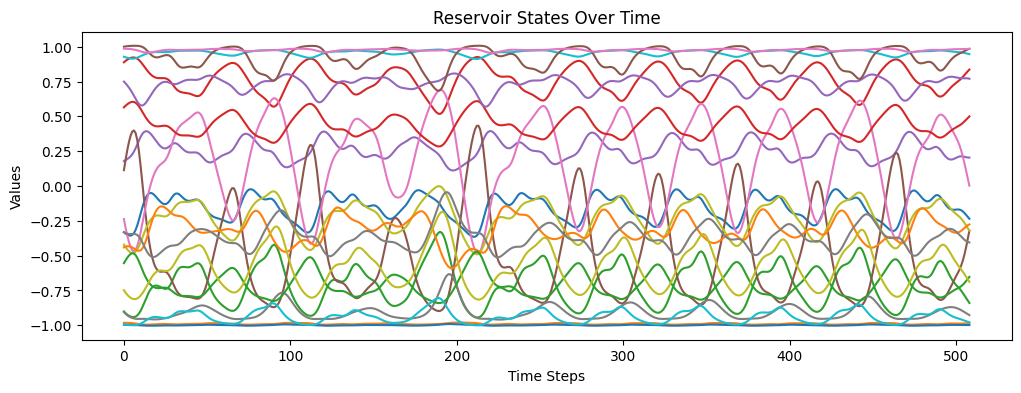

In [14]:
plot_reservoir_states(state)

In [15]:
rsquare(y_test1, predict), nrmse(y_test1, predict)

(0.9881558269262314, 0.026682953479995972)